In [304]:
import pandas as pd

df_teste = pd.read_csv(r"C:\Users\Pichau\OneDrive\Área de Trabalho\Kaggle Challenges\test.csv")
df_teste


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [270]:
df_treino = pd.read_csv(r"C:\Users\Pichau\OneDrive\Área de Trabalho\Kaggle Challenges\train.csv")
df_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [271]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [272]:
df_treino = df_treino.drop(columns=['PassengerId','Name','Ticket','Cabin'])


In [273]:
df_treino.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [274]:
#Preenchendo os dados ausentes de Embarked
df_treino['Embarked'] = df_treino['Embarked'].fillna(df_treino['Embarked'].mode()[0])

In [275]:
#Média e Variância antes da imputação
print(df_treino['Age'].mean())
print(df_treino['Age'].var())

29.69911764705882
211.0191247463081


In [276]:
#Preenchendo os dados ausentes de Age
#Escolhi o desvio padrão por afetar por a distribuição da Idade
df_treino['Age'] = df_treino['Age'].fillna(df_treino.groupby('Sex')['Age'].transform('std'))


In [277]:
#Média e Variância depois da imputação
print(df_treino['Age'].mean())
print(df_treino['Age'].var())

26.68137448305623
205.84293766810066


In [278]:
df_treino.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Outliers Age
{'whiskers': [<matplotlib.lines.Line2D object at 0x000001FA13CBEAB0>, <matplotlib.lines.Line2D object at 0x000001FA13CBF6B0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001FA13CBFEF0>, <matplotlib.lines.Line2D object at 0x000001FA1452B2F0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001FA1B8794C0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001FA14895EB0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001FA1594EC60>], 'means': []}


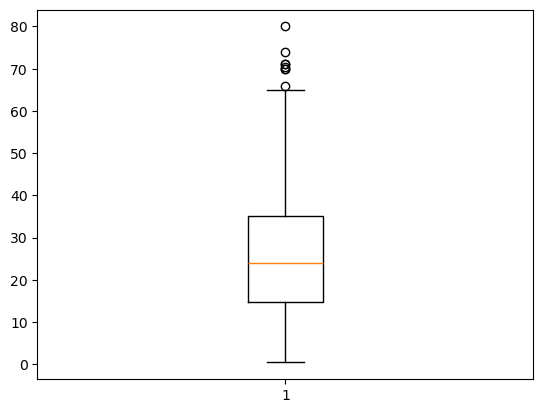

     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
33          0       2  male  66.0      0      0  10.5000        S
96          0       1  male  71.0      0      0  34.6542        C
116         0       3  male  70.5      0      0   7.7500        Q
493         0       1  male  71.0      0      0  49.5042        C
630         1       1  male  80.0      0      0  30.0000        S
672         0       2  male  70.0      0      0  10.5000        S
745         0       1  male  70.0      1      1  71.0000        S
851         0       3  male  74.0      0      0   7.7750        S
Outliers Fare
{'whiskers': [<matplotlib.lines.Line2D object at 0x000001FA1BD8D070>, <matplotlib.lines.Line2D object at 0x000001FA1BD8D310>], 'caps': [<matplotlib.lines.Line2D object at 0x000001FA1BD8D5E0>, <matplotlib.lines.Line2D object at 0x000001FA1BD8D8B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001FA1BD8CE60>], 'medians': [<matplotlib.lines.Line2D object at 0x000001FA1594EC60>], 'fliers

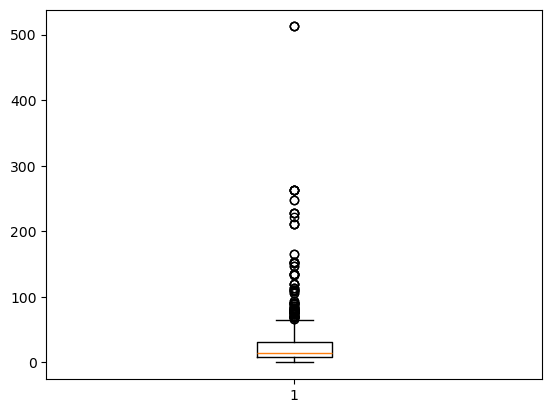

     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
33          0       2  male  66.0      0      0  10.5000        S
96          0       1  male  71.0      0      0  34.6542        C
116         0       3  male  70.5      0      0   7.7500        Q
493         0       1  male  71.0      0      0  49.5042        C
630         1       1  male  80.0      0      0  30.0000        S
672         0       2  male  70.0      0      0  10.5000        S
745         0       1  male  70.0      1      1  71.0000        S
851         0       3  male  74.0      0      0   7.7750        S


In [279]:
import matplotlib.pyplot as plt

colunas_numericas = ['Age','Fare']

for coluna in colunas_numericas : 
    Q1 = df_treino[coluna].quantile(0.25)
    Q3 = df_treino[coluna].quantile(0.75)
    IQR = Q3 - Q1 

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outlier = df_treino[(df_treino['Age'] > limite_superior) | (df_treino['Age'] < limite_inferior)]
    print(f"Outliers {coluna}")
    print(plt.boxplot(df_treino[coluna]))
    plt.show()
    print(outlier)
    


In [280]:
df_treino = df_treino.drop(index=outlier.index)


In [281]:
df_treino

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,14.110146,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [282]:
def classificar_idade(idade):
    if idade <= 5:
        return 0
    elif idade <= 12:
        return 1
    elif idade <= 17:
        return 2
    elif idade <= 29:
        return 3
    elif idade <= 59:
        return 4
    else:
        return 5

df_treino['Faixa_Etaria'] = df_treino['Age'].apply(classificar_idade)

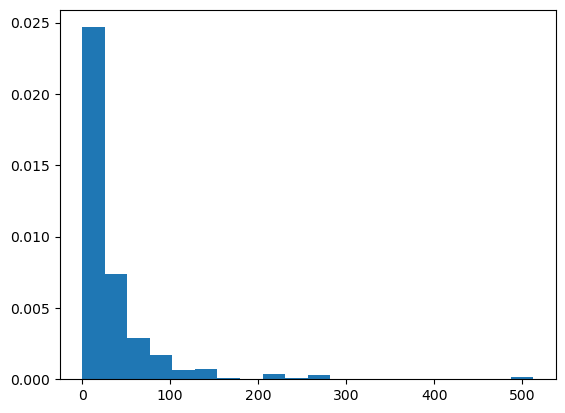

In [283]:
plt.hist(df_treino['Fare'],bins=20,density=True)
plt.show()

In [284]:
df_treino = df_treino.drop(columns=['Fare','Age'])

In [285]:
df_encoded = pd.get_dummies(df_treino,columns=['Sex','Embarked'])
colunas_transformar = ['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
for coluna in colunas_transformar : 
    df_encoded[coluna] = df_encoded[coluna].astype(int)

In [286]:
df_encoded

,Survived,Pclass,SibSp,Parch,Faixa_Etaria,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,3,0,1,0,0,1
1,1,1,1,0,4,1,0,1,0,0
2,1,3,0,0,3,1,0,0,0,1
3,1,1,1,0,4,1,0,0,0,1
4,0,3,0,0,4,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,3,0,1,0,0,1
887,1,1,0,0,3,1,0,0,0,1
888,0,3,1,2,2,1,0,0,0,1
889,1,1,0,0,3,0,1,1,0,0


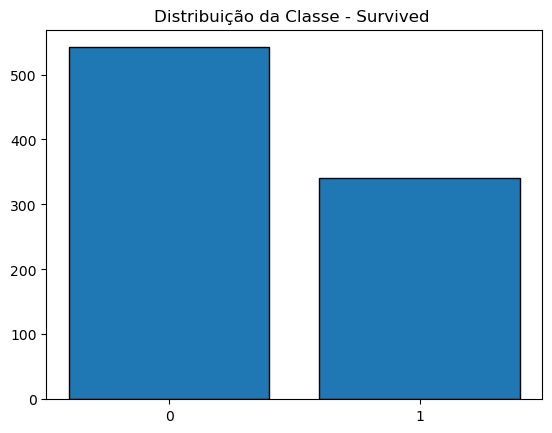

In [287]:
histograma_classe = df_encoded['Survived'].value_counts()
plt.title("Distribuição da Classe - Survived ")
plt.bar(histograma_classe.index,histograma_classe.values,edgecolor='black')
plt.xticks([0,1])
plt.show()


In [288]:
x = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

In [289]:
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

model = DecisionTreeClassifier(random_state=42)

In [290]:
search_spaces = {
    "max_depth": (2, 20),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 20),
    "criterion": ["gini", "entropy", "log_loss"]
}

melhor_modelo = BayesSearchCV(
        estimator= model,
        search_spaces=search_spaces,
        n_iter=30,                
        cv=10,                     
        scoring="accuracy",
        random_state=42,
        n_jobs=-1
    )

In [291]:
melhor_modelo.fit(x,y)

BayesSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
              n_iter=30, n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy', 'log_loss'],
                             'max_depth': (2, 20), 'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20)})

In [292]:
melhor_modelo.best_params_

OrderedDict([('criterion', 'log_loss'),
             ('max_depth', 19),
             ('min_samples_leaf', 4),
             ('min_samples_split', 5)])

In [293]:
df_teste = df_teste.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'])

In [294]:
df_teste.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [295]:
#Preenchendo os dados ausentes de Age(df_teste)
#Escolhi o desvio padrão por afetar por a distribuição da Idade
df_teste['Age'] = df_teste['Age'].fillna(df_teste.groupby('Sex')['Age'].transform('std'))


In [296]:

df_teste['Faixa_Etaria'] = df_teste['Age'].apply(classificar_idade)

In [298]:
df_teste = df_teste.drop(columns=['Age'])

In [299]:
df_teste = pd.get_dummies(df_teste,columns=['Sex','Embarked'])
colunas_transformar = ['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
for coluna in colunas_transformar : 
    df_teste[coluna] = df_teste[coluna].astype(int)

In [300]:
df_teste

,Pclass,SibSp,Parch,Faixa_Etaria,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,4,0,1,0,1,0
1,3,1,0,4,1,0,0,0,1
2,2,0,0,5,0,1,0,1,0
3,3,0,0,3,0,1,0,0,1
4,3,1,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,0,2,0,1,0,0,1
414,1,0,0,4,1,0,1,0,0
415,3,0,0,4,0,1,0,0,1
416,3,0,0,2,0,1,0,0,1


In [301]:
y_pred = melhor_modelo.predict(df_teste)

In [308]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [314]:
import pandas as pd

# IDs de 892 até 1309
ids = list(range(892, 1310))  # 1310 não entra no range, então vai até 1309

# Criar DataFrame com PassengerId e previsão
df_submissao = pd.DataFrame({
    "PassengerId": ids,
    "Survived": y_pred
})
df_submissao



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_submissao.to_csv("titanic_model_prediction.csv")